In [6]:
import pandas as pd
import numpy as np
import os

In [7]:
# Read the data from the CSV file into a pandas DataFrame
df = pd.read_csv('../Outputs/cleaned_data.csv')

##### Does the majority of popular songs have a high energy level?

Correlation between Energy and Popularity: -0.03


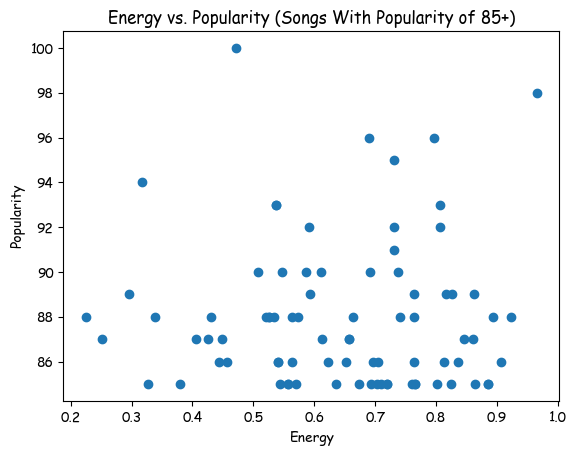

In [8]:
import matplotlib.pyplot as plt

# Filter songs with popularity level of 85 or more
high_popularity_songs = df[df['popularity'] >= 85]

# Calculate the correlation between popularity and energy
correlation = high_popularity_songs['popularity'].corr(high_popularity_songs['energy'])

# Create the scatter plot
plt.scatter(high_popularity_songs['energy'], high_popularity_songs['popularity'])

# Set the plot title and axis labels
plt.title('Energy vs. Popularity (Songs With Popularity of 85+)')
plt.xlabel('Energy')
plt.ylabel('Popularity')

# Calculate the correlation between 'energy' and 'popularity'
correlation = df['energy'].corr(df['popularity'])

# Print the correlation value
print(f"Correlation between Energy and Popularity: {correlation:.2f}")

# Show the plot
plt.show()

### Analysis:

There is a very weak, negative correlation between the 'engery' and popularity' of the songs in the dataset.
The points are concentrated around the energy values of 0.5-0.9, and the popularity values of 85-90. There are some outlier beyond the concentration range, this would represent songs with low energy level but still acheiveing relatively high popularity. In conclusion, songs with high popularity do not always have high energy.

### Find the top 10 artists based on their average popularity

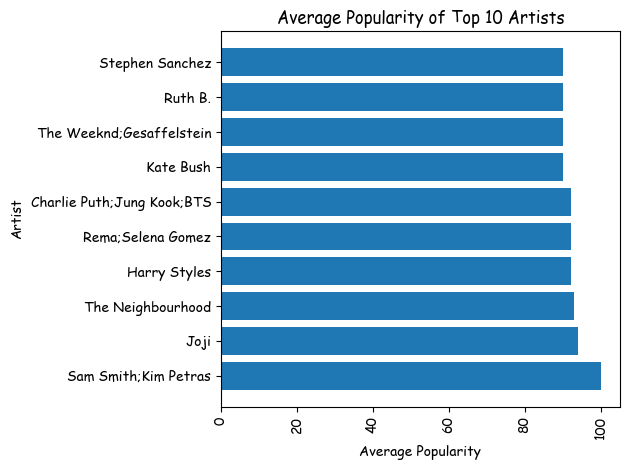

In [10]:
# Calculate the average popularity per artist
import matplotlib.font_manager as fm


# Define the font properties (family, weight, size)

plt.rcParams['font.family'] = ['cursive', 'fantasy', 'monospace', 'sans', 'sans serif', 'sans-serif', 'serif']

df['artists'] = df['artists'].str.replace('$$', '', regex=False)

avg_popularity = df.groupby('artists')['popularity'].mean()

# Sort the artists based on their average popularity in descending order
sorted_artists = avg_popularity.sort_values(ascending=False)

# Get the top 10 artists
top_10_artists = sorted_artists.head(10)

# Plot the bar chart
plt.barh(top_10_artists.index, top_10_artists.values)

# Set the plot title and axis labels
plt.title('Average Popularity of Top 10 Artists')
plt.ylabel('Artist')
plt.xlabel('Average Popularity')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Adjust the layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
# Group the data by 'artists' and calculate the mean of 'popularity'
avg_popularity = df.groupby('artists')['popularity'].mean()

# Sort the artists based on their average popularity in descending order
sorted_artists = avg_popularity.sort_values(ascending=False)

# Get the top 10 artists
sorted_artists.head(10)

artists
Sam Smith;Kim Petras          100.0
Joji                           94.0
The Neighbourhood              93.0
Harry Styles                   92.0
Rema;Selena Gomez              92.0
Charlie Puth;Jung Kook;BTS     92.0
Kate Bush                      90.0
The Weeknd;Gesaffelstein       90.0
Ruth B.                        90.0
Stephen Sanchez                90.0
Name: popularity, dtype: float64

### Find the top 10 artists based on total number of songs per artist

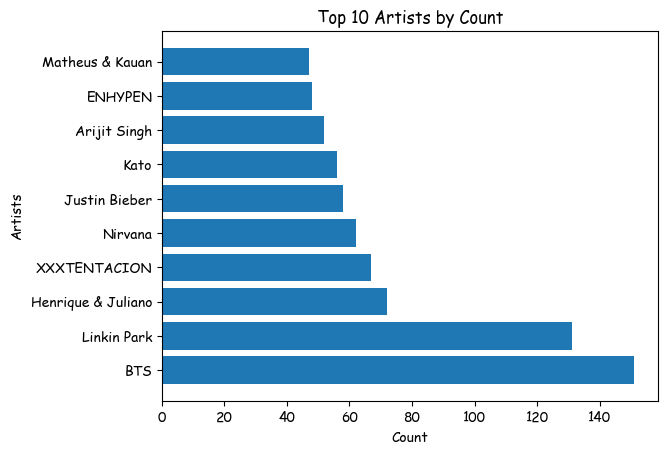

In [12]:
# Get the top 10 artists based on total number of songs per artist
top_10_artists = df.groupby('artists')['track_name'].count().reset_index(name='count').sort_values(by='count', ascending=False).head(10)

# Sort the DataFrame by 'count' column in descending order
top_10_artists = top_10_artists.sort_values(by='count', ascending=False)

# Plotting the horizontal bar chart
plt.barh(top_10_artists['artists'], top_10_artists['count'])

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Artists')
plt.title('Top 10 Artists by Count')

# Display the plot
plt.show()
